Creating training data batches...
Creating validation data batches...
TF version: 2.1.0
TF Hub version: 0.8.0
GPU not available
Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Train for 7 steps, validate for 2 steps
Epoch 1/100
7/7 [==============================] - 51s 7s/step - loss: 0.8082 - accuracy: 0.6012 - val_loss: 0.3216 - val_accuracy: 0.8786
Epoch 2/100
7/7 [==============================] - 45s 6s/step - loss: 0.1281 - accuracy: 0.9585 - val_loss: 0.0836 - val_accuracy: 0.9709
Epoch 3/100
7/7 [==============================] - 63s 9s/step - loss: 0.0351 - accuracy: 0.9915 - val_loss: 0.0357 - val_accuracy: 0.9951
Epoch 4/100
7/7 [==============================] - 74s 11s/step - loss: 0.0160 - accuracy: 0.9976 - val_loss: 0.0225 - val_accuracy: 0.9951
Epoch 5/100
7/7 [==============================] - 71s 10s/step - loss: 0.0103 - accuracy: 0.9976 - val_loss: 0.0170 - val_accuracy: 0.9951
Epoch 6/100
7/7 [=========================

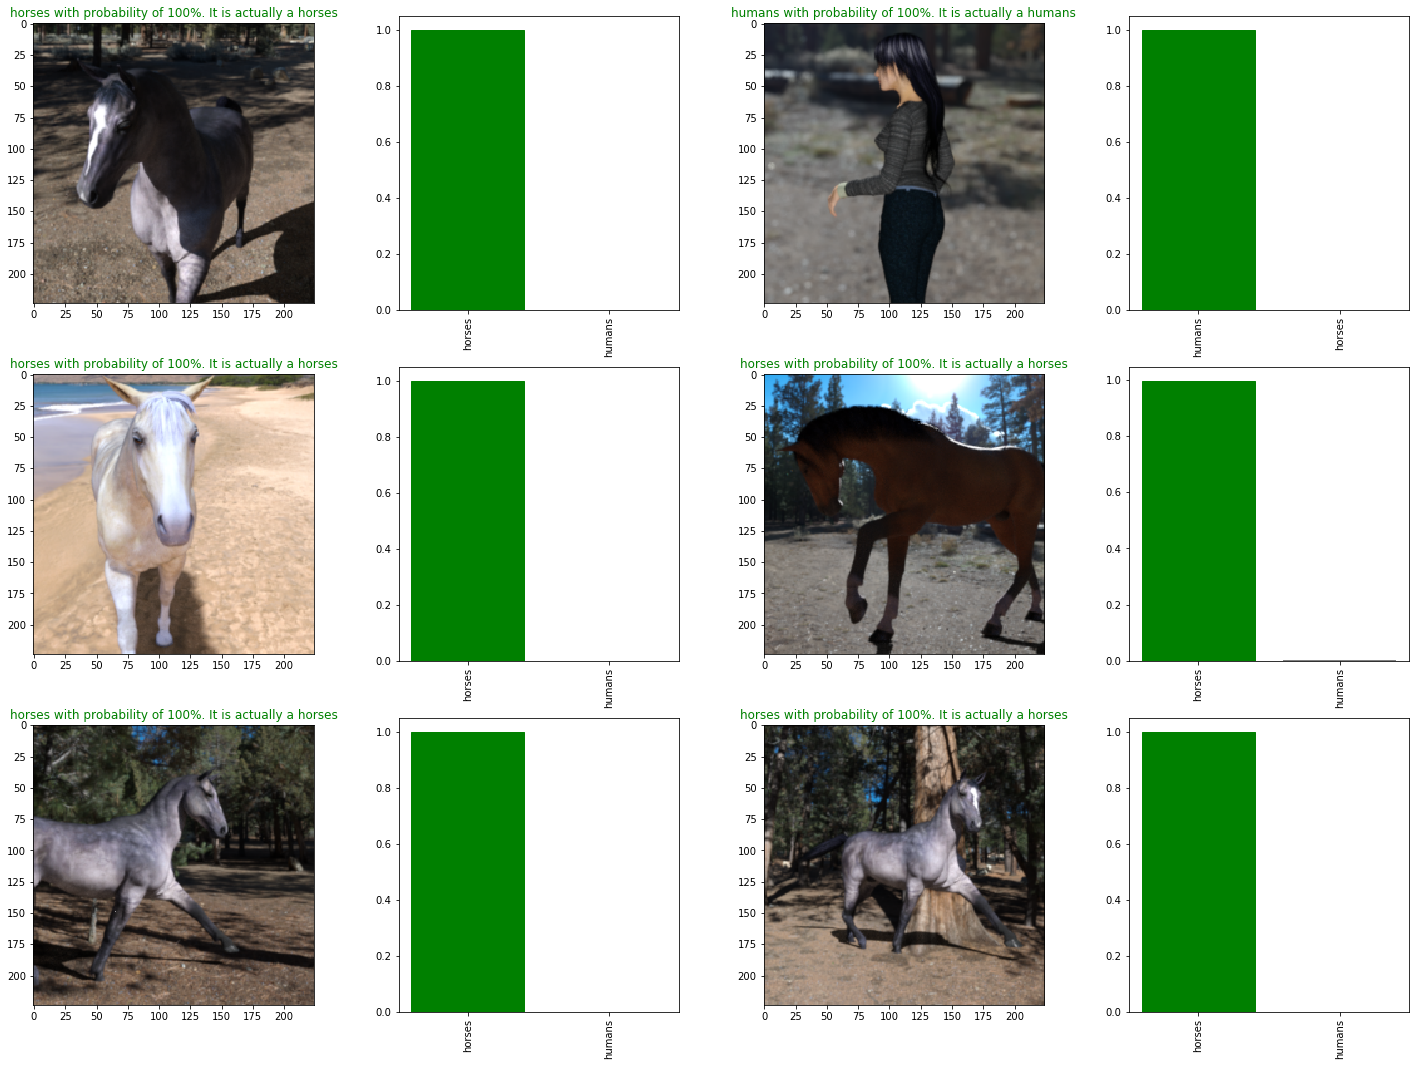

In [1]:
path = "D:/datasets/horse-or-human"

# start tensorboard with `tensorboard --logdir='{path}/logs' --port 2222`

from scripts.import_data import import_data
from scripts.preprocessing import preprocessing
from scripts.model import model
from scripts.predict import predict

i_d = import_data(path)
i_d.import_raw_data()
i_d.get_raw_traindata()
X_train, X_val, y_train, y_val = i_d.X_train, i_d.X_val, i_d.y_train, i_d.y_val

p = preprocessing(i_d.unique_labels, BATCH_SIZE=128)
train_data = p.create_data_batches(X_train,y_train)
val_data = p.create_data_batches(X_val,y_val,valid_data=True)

m = model(i_d.unique_labels, path)
model = m.train_model(train_data, val_data)

pre = predict(model, val_data, i_d.unique_labels)
pre.check_predictions()